## 1. GPX Analysis

First GPX Data Analysis for Strava

<a href="1 - GPX Analysis.ipynb">1 - GPX Analysis.ipynb</a>

## 2. Visualise Some Graphs

In [ ]:
from utils import *

import seaborn as sns
sns.set()

In [ ]:
data = loadCorrelatedData()
#data = loadCleanData()
data.head()

In [ ]:
data.shape

In [ ]:
print(data["Distance"].sum(), "km")

Lost 13kgs! (~28lbs!)
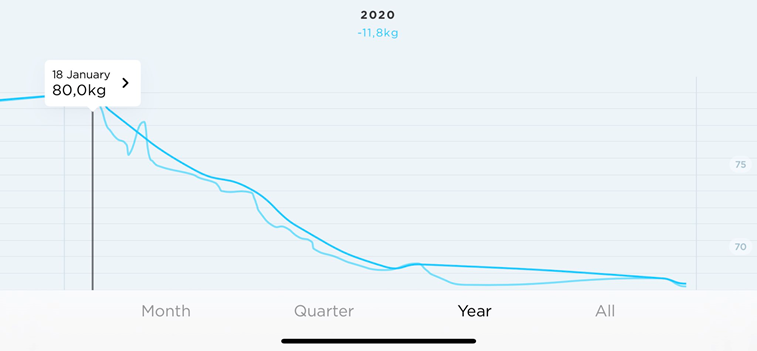

#### Weekly Total Ride Distance Graph

In [ ]:
df = data.groupby(pd.Grouper(key='Week', freq='W-MON'))['Distance'].sum().reset_index().sort_values('Week')
df.plot(x='Week',y='Distance', marker='o', figsize=(14,8))

#### Ride Distance Graph

In [ ]:
sns.barplot(x="Activity Type", y="Distance", data=data, estimator=sum)

In [ ]:
data.plot(kind='scatter',x='index',y='Activity Type', figsize=(14,5))

In [ ]:
#data.plot(kind='scatter',x='index',y='Activity Name', figsize=(14,8))

#### Ride distribution in a Week

In [ ]:
data.plot(kind='scatter', x='dayOfWeek', y='Distance', xticks=data['dayOfWeek'], figsize=(14,8))

#### Ride on Weekdays or Weekends?

In [ ]:
data.plot(kind='scatter', x='isWeekend', y='Distance', xticks=data['isWeekend'], figsize=(14,8))

#### Weather Conditions on indoor or outdoor ride

In [ ]:
data.plot(kind='scatter', x='rideType', y='temp', xticks=data['rideType'], figsize=(14,8))

#### Distance on time

In [ ]:
import matplotlib.pyplot as plt

# Distance Graph per day
plt.figure(figsize=(15,8))
distGraph = sns.scatterplot(data=data, x="Activity Date", y="Distance", hue="Activity Type")
distGraph.set(xticklabels=[]) 
distGraph.set(xlabel="Activity Date")
distGraph.tick_params(bottom=False)
distGraph

#### Distance & Elevation

In [ ]:
#with sns.axes_style('white'):
#    sns.jointplot(x=data["Distance"], y=data["Elevation Gain"], data=data, kind='hex')

#### Power Distribution on a Ride

In [ ]:
## Ride with tire issue
#data["Activity Name"][187]  #162 #161 #135

In [ ]:
virtualSteps = getVirtualLocations(fileOutputPath,getFilename(data['Filename'][135]))

import pandas as pd 
  
dfSteps = pd.DataFrame(virtualSteps, columns =['Latitude', 'Longtitude','Elevation','Power','Date']) 
dfSteps = dfSteps.astype({"Power": int})

plt.figure(figsize=(15,8))
powerPlot = sns.lineplot(data=dfSteps, x="Date", y="Power")
powerPlot.set(xticklabels=[]) 
powerPlot.set(xlabel=None)
powerPlot.tick_params(bottom=False) 
powerPlot

In [ ]:
dfSteps['Power'].plot(kind = 'hist', figsize=(14,8))

## 3. Interactive Dashboard

Interactive Dashboard

<a href="6 - Interactive Dashboard.ipynb">6 - Interactive Dashboard.ipynb</a>

## 4. Prediction

Predict Workout Distance and Ride Type

<a href="8 - Predict Workout.ipynb">8 - Predict Workout.ipynb</a>